### Fine Tuning Task  

강아지, 머핀 이진 분류  
https://drive.google.com/file/d/1Q_KC2nTmGlX2PeINWwV63_kpTjnoVpiO/view?usp=sharing

In [2]:
from glob import glob
import os

train_root = './datasets/muffin/original/'

directories = glob(os.path.join(train_root, '*'))
directory_names = []
for directory in directories:
    # print(directory)
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['chihuahua', 'muffin']


In [3]:
for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(train_root, name))):
        old_file = os.path.join(train_root + name + '/', file_name)
        new_file = os.path.join(train_root + name + '/', name + str(i + 1) + '.png')

        os.rename(old_file, new_file)

In [5]:
from glob import glob
import os

test_root = './datasets/muffin/test/'

directories = glob(os.path.join(test_root, '*'))
directory_names = []
for directory in directories:
    # print(directory)
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['chihuahua', 'muffin']


In [6]:
for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(test_root, name))):
        old_file = os.path.join(test_root + name + '/', file_name)
        new_file = os.path.join(test_root + name + '/', name + str(i + 1) + '.png')

        os.rename(old_file, new_file)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = image_data_generator.flow_from_directory(train_root, target_size=(100, 100), batch_size=32, class_mode='categorical')
print(train_generator.class_indices)

Found 4733 images belonging to 2 classes.
{'chihuahua': 0, 'muffin': 1}


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale=1./255)

test_generator = image_data_generator.flow_from_directory(test_root, target_size=(100, 100), batch_size=32, class_mode='categorical')
print(test_generator.class_indices)

Found 1184 images belonging to 2 classes.
{'chihuahua': 0, 'muffin': 1}


In [9]:
import pandas as pd

train_df = pd.DataFrame({'file_paths': train_generator.filepaths, 'targets': train_generator.classes})
train_df

,file_paths,targets
0,./datasets/muffin/original/chihuahua\chihuahua...,0
1,./datasets/muffin/original/chihuahua\chihuahua...,0
2,./datasets/muffin/original/chihuahua\chihuahua...,0
3,./datasets/muffin/original/chihuahua\chihuahua...,0
4,./datasets/muffin/original/chihuahua\chihuahua...,0
...,...,...
4728,./datasets/muffin/original/muffin\muffin995.png,1
4729,./datasets/muffin/original/muffin\muffin996.png,1
4730,./datasets/muffin/original/muffin\muffin997.png,1
4731,./datasets/muffin/original/muffin\muffin998.png,1


In [10]:
test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'targets': test_generator.classes})
test_df

,file_paths,targets
0,./datasets/muffin/test/chihuahua\chihuahua1.png,0
1,./datasets/muffin/test/chihuahua\chihuahua10.png,0
2,./datasets/muffin/test/chihuahua\chihuahua100.png,0
3,./datasets/muffin/test/chihuahua\chihuahua101.png,0
4,./datasets/muffin/test/chihuahua\chihuahua102.png,0
...,...,...
1179,./datasets/muffin/test/muffin\muffin95.png,1
1180,./datasets/muffin/test/muffin\muffin96.png,1
1181,./datasets/muffin/test/muffin\muffin97.png,1
1182,./datasets/muffin/test/muffin\muffin98.png,1


In [11]:
train_df.loc[:, 'file_paths'] = train_df.file_paths.apply(lambda x: x.replace('\\', '/'))
train_df

,file_paths,targets
0,./datasets/muffin/original/chihuahua/chihuahua...,0
1,./datasets/muffin/original/chihuahua/chihuahua...,0
2,./datasets/muffin/original/chihuahua/chihuahua...,0
3,./datasets/muffin/original/chihuahua/chihuahua...,0
4,./datasets/muffin/original/chihuahua/chihuahua...,0
...,...,...
4728,./datasets/muffin/original/muffin/muffin995.png,1
4729,./datasets/muffin/original/muffin/muffin996.png,1
4730,./datasets/muffin/original/muffin/muffin997.png,1
4731,./datasets/muffin/original/muffin/muffin998.png,1


In [12]:
test_df.loc[:, 'file_paths'] = test_df.file_paths.apply(lambda x: x.replace('\\', '/'))
test_df

,file_paths,targets
0,./datasets/muffin/test/chihuahua/chihuahua1.png,0
1,./datasets/muffin/test/chihuahua/chihuahua10.png,0
2,./datasets/muffin/test/chihuahua/chihuahua100.png,0
3,./datasets/muffin/test/chihuahua/chihuahua101.png,0
4,./datasets/muffin/test/chihuahua/chihuahua102.png,0
...,...,...
1179,./datasets/muffin/test/muffin/muffin95.png,1
1180,./datasets/muffin/test/muffin/muffin96.png,1
1181,./datasets/muffin/test/muffin/muffin97.png,1
1182,./datasets/muffin/test/muffin/muffin98.png,1


In [13]:
train_df.targets.value_counts()

targets
0    2559
1    2174
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
train_test_split(train_df.file_paths, train_df.targets, stratify=train_df.targets, test_size=0.2, random_state=124)

print(y_train.value_counts())
print(y_val.value_counts())

targets
0    2047
1    1739
Name: count, dtype: int64
targets
0    512
1    435
Name: count, dtype: int64


In [15]:
X_test = test_df.file_paths
y_test = test_df.targets

print(y_test.value_counts())

targets
0    640
1    544
Name: count, dtype: int64


In [16]:
import shutil

root = './datasets/muffin/'

for file_path in X_train:
    dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [17]:
import shutil

root = './datasets/muffin/'

for file_path in X_val:
    dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + dir)

    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

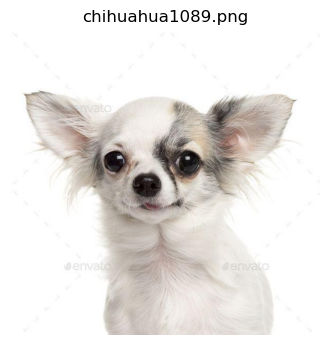

In [19]:
import cv2
import matplotlib.pyplot as plt

file_index = 100

image = cv2.cvtColor(cv2.imread(train_generator.filepaths[file_index]), cv2.COLOR_BGR2RGB)


def show_image(image):
    plt.figure(figsize=(4, 4))
    plt.title(train_generator.filepaths[file_index].split('\\')[1])
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [22]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

model = VGG16()
image = load_img('./datasets/chiwawa.jpg', target_size=(224, 224))
image = img_to_array(image)

# 불러온 이미지의 차원을 1차수 늘려준다. 4차원으로.
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
target = decode_predictions(prediction)
print(target)

# 가장 높은 하나의 답만 출력할 때
print(target[0][0])
# 답의 이름과 확률을 출력할 때
print(target[0][0][1], f'{np.round(target[0][0][2] * 100, 4)}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
[[('n02085620', 'Chihuahua', 0.8913765), ('n02086910', 'papillon', 0.06528197), ('n02087046', 'toy_terrier', 0.023754241), ('n02098286', 'West_Highland_white_terrier', 0.0033437903), ('n02113978', 'Mexican_hairless', 0.0019478541)]]
('n02085620', 'Chihuahua', 0.8913765)
Chihuahua 89.1376%


In [24]:
import albumentations as A
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def transform(image):
    aug = A.Compose([
        # 좌우 반전
        A.HorizontalFlip(p=0.5),
        # 상하 반전
        A.VerticalFlip(p=0.5),
        # 채널 변환
        # A.ChannelShuffle(p=0.5),
        # 밝기
        # A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
        # 노이즈 생성
        # A.GaussNoise(p=0.5, var_limit=(400, 900)),
        # 흐림
        # A.Blur(p=0.5, blur_limit=(3, 5))
    ], p=0.5)

    return aug(image=image)['image']

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/muffin/train'
validation_dir = './datasets/muffin/validation'
test_dir = './datasets/muffin/test'

train_data_generator = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=16,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 3786 images belonging to 2 classes.
Found 947 images belonging to 2 classes.
Found 1184 images belonging to 2 classes.
{'chihuahua': 0, 'muffin': 1}
{'chihuahua': 0, 'muffin': 1}
{'chihuahua': 0, 'muffin': 1}


In [29]:
target_name = {v: k for k, v in train_generator.class_indices.items()}
target_name

{0: 'chihuahua', 1: 'muffin'}

In [30]:
target_names = []
for target in train_generator.classes:
    target_names.append(target_name[target])

In [31]:
import pandas as pd

train_df = pd.DataFrame({'file_paths': train_generator.filepaths, 'target_names': target_names, 'targets': train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
train_df

,file_paths,target_names,targets
0,./datasets/muffin/train/chihuahua/chihuahua1.png,chihuahua,0
1,./datasets/muffin/train/chihuahua/chihuahua10.png,chihuahua,0
2,./datasets/muffin/train/chihuahua/chihuahua100...,chihuahua,0
3,./datasets/muffin/train/chihuahua/chihuahua100...,chihuahua,0
4,./datasets/muffin/train/chihuahua/chihuahua100...,chihuahua,0
...,...,...,...
3781,./datasets/muffin/train/muffin/muffin995.png,muffin,1
3782,./datasets/muffin/train/muffin/muffin996.png,muffin,1
3783,./datasets/muffin/train/muffin/muffin997.png,muffin,1
3784,./datasets/muffin/train/muffin/muffin998.png,muffin,1


In [33]:
target_names = []
for target in validation_generator.classes:
    target_names.append(target_name[target])

In [34]:
import pandas as pd

validation_df = pd.DataFrame({'file_paths': validation_generator.filepaths, 'target_names': target_names, 'targets': validation_generator.classes})
validation_df.file_paths = validation_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/')) 
validation_df

,file_paths,target_names,targets
0,./datasets/muffin/validation/chihuahua/chihuah...,chihuahua,0
1,./datasets/muffin/validation/chihuahua/chihuah...,chihuahua,0
2,./datasets/muffin/validation/chihuahua/chihuah...,chihuahua,0
3,./datasets/muffin/validation/chihuahua/chihuah...,chihuahua,0
4,./datasets/muffin/validation/chihuahua/chihuah...,chihuahua,0
...,...,...,...
942,./datasets/muffin/validation/muffin/muffin982.png,muffin,1
943,./datasets/muffin/validation/muffin/muffin984.png,muffin,1
944,./datasets/muffin/validation/muffin/muffin988.png,muffin,1
945,./datasets/muffin/validation/muffin/muffin990.png,muffin,1


In [35]:
target_names = []
for target in test_generator.classes:
    target_names.append(target_name[target])

In [36]:
import pandas as pd

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
test_df

,file_paths,target_names,targets
0,./datasets/muffin/test/chihuahua/chihuahua1.png,chihuahua,0
1,./datasets/muffin/test/chihuahua/chihuahua10.png,chihuahua,0
2,./datasets/muffin/test/chihuahua/chihuahua100.png,chihuahua,0
3,./datasets/muffin/test/chihuahua/chihuahua101.png,chihuahua,0
4,./datasets/muffin/test/chihuahua/chihuahua102.png,chihuahua,0
...,...,...,...
1179,./datasets/muffin/test/muffin/muffin95.png,muffin,1
1180,./datasets/muffin/test/muffin/muffin96.png,muffin,1
1181,./datasets/muffin/test/muffin/muffin97.png,muffin,1
1182,./datasets/muffin/test/muffin/muffin98.png,muffin,1


In [38]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(3786, 3)
(947, 3)
(1184, 3)


In [39]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

IMAGE_SIZE = 244
BATCH_SIZE = 64

class Dataset(Sequence):
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        if self.shuffle:
            # 에포크 종료 시, 객체 생성 및 데이터 섞기
            self.on_epoch_end()

    # __len__()는 전체 데이터 건수에서 batch_size 단위로 나눈 데이터 수
    # 예를 들어, 1000개의 데이터를 30 batch_size로 설정하면, 1 batch당 33.33..개이다.
    # 이 때, 소수점은 무조건 올려서 33 + 1 = 34개로 설정한다.
    def __len__(self):
        return int(np.ceil(len(self.targets) / self.batch_size))

    # batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        for i in range(file_paths_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            if self.aug is not None:
                image = self.aug(image=image)['image']

            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            results_batch[i] = image

        return results_batch, targets_batch
        
    def on_epoch_end(self):
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [40]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=xception_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input)

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(2, activation='sigmoid', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [49]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras import layers

IMAGE_SIZE = 224
BATCH_SIZE = 64

def fine_tune(datas, model_name, aug, preprocess):
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=xception_preprocess_input, 
                        shuffle=True)

    validation_dataset = Dataset(validation_file_paths, 
                            validation_targets, 
                            batch_size=BATCH_SIZE, 
                            preprocess=xception_preprocess_input)
    
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze
    for layer in model.layers[:-5]:
        layer.trainable = False

    model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=FIRST_EPOCHS, 
              validation_data=validation_dataset)

    # 배치 정규화만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    model.compile(optimizer=Adam(0.00001), loss=BinaryCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset, 
              batch_size=BATCH_SIZE, 
              epochs=SECOND_EPOCHS, 
              validation_data=validation_dataset)
    
    return model, history

In [50]:
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

model, history = fine_tune((train_file_paths, train_targets,
           validation_file_paths, validation_targets,
           test_file_paths, test_targets),
          'mobilenet', 
          aug,
          mobilenet_preprocess_input)

C:\Users\user\AppData\Local\Temp\ipykernel_17196\1742438358.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,136 (8.86 MB)

 Trainable params: 2,288,024 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - acc: 0.8467 - loss: 0.3660 - val_acc: 0.9894 - val_loss: 0.0358
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - acc: 0.9756 - loss: 0.0823 - val_acc: 0.9926 - val_loss: 0.0292
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - acc: 0.9829 - loss: 0.0535 - val_acc: 0.9926 - val_loss: 0.0277
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - acc: 0.9845 - loss: 0.0514 - val_acc: 0.9947 - val_loss: 0.0246
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - acc: 0.9874 - loss: 0.0427 - val_acc: 0.9947 - val_loss: 0.0244
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - acc: 0.9898 - loss: 0.0335 - val_acc: 0.9937 - val_loss: 0.0246
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - acc: 0.9894 - loss: 0.0382 - val_acc: 0.9937 - val_loss: 0.0251
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - acc: 0.9914 - loss: 0.0254 - val_acc: 0.9947 - val_loss: 0.0239
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - acc: 0.9874 - loss: 0.

NameError: name 'layers' is not defined